In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Load The Data

In [2]:
sales = pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv')

In [3]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
# Target variable
y = sales['Sales']
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [5]:
X = sales.drop(['Sales'], axis = 1)
X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


### Let's check the strength of the correlation of features with the target variable using HeatMap

In [6]:
corr = sales.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

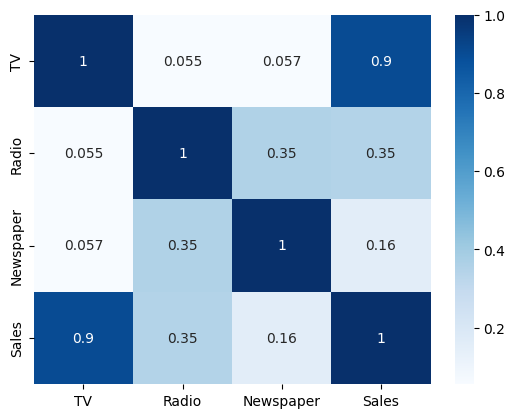

In [7]:
sns.heatmap(corr,cmap = 'Blues', annot = True)

#### There's a very strong relation of 'Tv' with Sales and other features too have decent relation

### Split the data into training and testing

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

### As the correlation is strong, we will go for a regression model

##### We will use Random Forest Regressor as it is a very strong bagging method which improves the performance of the model

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
# Model
model = RandomForestRegressor()

In [11]:
# Fit the model
model.fit(X_train,y_train)

# Predict the model
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import r2_score

In [13]:
# Check the performance of the model
r2 = r2_score(y_test,y_pred)
r2

0.9464138903352568

#### Our model performs pretty good!!